# Explorando bases de textos anotados

[Voltar ao Índice](00_indice.ipynb)

Aqui exploramos os corpus (conjuntos de textos) fornecidos por Fortuna _et al._ (2019) e Pelle & Moreira (2017), para entendermos o significado das colunas, os tipos de dados, etc.

## Explorando dados hierárquicos da Paula Fortuna

Fonte: <https://github.com/paulafortuna/Portuguese-Hate-Speech-Dataset>

In [1]:
import pandas as pd

import xavy.explore as xe
import xavy.dataframes as xd

### Carregando os dados

In [2]:
hierarchy_df = pd.read_csv('../dados/brutos/Portuguese-Hate-Speech-Dataset/2019-05-28_portuguese_hate_speech_hierarchical_classification.csv')

In [3]:
hierarchy_df.head()

,text,Hate.speech,Sexism,Body,Racism,Ideology,Homophobia,Origin,Religion,Health,...,Thin.women,Arabic,East.europeans,Africans,South.Americans,Brazilians,Migrants,Homossexuals,Thin.people,Ageing
0,"""não come mel, morde marimbondo""",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"não tem pinto, tem orgulho !",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Não vê essa merda de Crepúsculo! Pra isso temo...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"não da tapa na bundinha, da cotovelada nas cos...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,o diminutivo INHO não acompanha a trajetória d...,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Características básicas

In [4]:
len(hierarchy_df)

5668

In [5]:
xe.checkMissing(hierarchy_df)

Colunas com valores faltantes:
Empty DataFrame
Columns: [coluna, N, %]
Index: []


In [6]:
xe.mapUnique(hierarchy_df)


text: 5668 unique values.
(sample) "você é burro"  o argumento da "Jênia"
Mas não consegue refutar uma linha do que falei!
Eis a bolha do marxismo cul _ https://t.co/w1yV35loON,  @Estadao que mulher suja da porra,  @gentemagra1 apresenta pra ela miga @homemcis,  @mariacpbruno esse não era bandido, para a Felgueiras, era meigo.,  A música não tem cores, nem classes é para todos.
Um simples projeto que muda a vida de muitas pessoas. 
 https://t.co/gVFuwtXodn,  A nossa Nação é a nossa "casa", correcto?
E as casas têm portas, não é verdade?
Então?
#ForçaTrump https://t.co/RTEys6FTKK,  Como assim agora a @RedeGlobo golpista serve pra algo @karine_amaral? https://t.co/pPQjbtNgQ3,  E mais: odeia o Bolsonaro?
Então fala ai dos projeto dele q tu discorda e porquê.Vamos ver sua inteligencia,nível d _ https://t.co/r1mH16f0GS,  Estes 2 golos e as respetivas jogadas são mais uma prova de que o Benfica está a ser claramente levado ao colo na Taça da Liga
#VERGONHA,  Fátima Bernardes não pára de rep

In [33]:
hierarchy_df['Hate.speech'].value_counts()

0    4440
1    1228
Name: Hate.speech, dtype: int64

### Exemplos de classificação

In [ ]:
hierarchy_df.columns

Index(['text', 'Hate.speech', 'Sexism', 'Body', 'Racism', 'Ideology',
       'Homophobia', 'Origin', 'Religion', 'Health', 'OtherLifestyle',
       'Aborting.women', 'Agnostic', 'Argentines', 'Asians', 'Autists',
       'Black.Women', 'Blond.women', 'Brazilians.women', 'Chinese',
       'Criminals', 'Egyptians', 'Fat.people', 'Football.players.women',
       'Gamers', 'Homeless', 'Homeless.women', 'Indigenous', 'Iranians',
       'Japaneses', 'Jews', 'Jornalists', 'Latins', 'Left.wing.ideology',
       'Men.Feminists', 'Mexicans', 'Muslims.women', 'Nordestines',
       'Old.people', 'Polyamorous', 'Poor.people', 'Rural.people', 'Russians',
       'Sertanejos', 'Street.artist', 'Ucranians', 'Vegetarians',
       'White.people', 'Young.people', 'Old.women', 'Ugly.people',
       'Venezuelans', 'Angolans', 'Black.people', 'Disabled.people',
       'Fat.women', 'Feminists', 'Gays', 'Immigrants', 'Islamists', 'Lesbians',
       'Men', 'Muslims', 'Refugees', 'Trans.women', 'Travestis', 'Wome

In [40]:
col = 'Sexism' 

# Textos com violência:
print(xe.bold('Violência'))
xd.print_string_series(hierarchy_df.loc[hierarchy_df[col] == 1, 'text'].sample(5))
print('')
# Textos com violência (tipicamente xingamentos):
print(xe.bold('Não-Violência'))
xd.print_string_series(hierarchy_df.loc[hierarchy_df[col] == 0, 'text'].sample(5))

Violência
4752: Eu sei que para ser bonita não precisa ser magra, mas eu coloquei na minha fucking cabeça de que estou muito gorda e feia
11: @homemdeverdade não tem namorada, tem fêmea temporária.
4298: filho nunca segurou e nunca vai segurar macho, ainda mais se for esses mlq da vida,mulher q engravida sabendo q o cara é safado,é burra sim
5400: @g1 O politicamente correto está acabando com a sociedade. Mulher burra é que se sente ofendida com isto. Tenho orgulho de saber o preço.
3889: @editorahumanas quem é essa doida aí? uma feminista?

Não-Violência
1056: Olha ae a oportunidade q vc queria: ganhar o respeito do "tico". Imperdível! https://t.co/AkKrQsEo72
5137: Claro! A alienação é o melhor caminho pra você! Continue nessa bolha!!! https://t.co/MqBdnFkc4K
1819: Isto é cá um grande buraco!.. Como é que o #Sócrates anda cá fora?
@Lusa_noticias @rtppt @dn @fcancio _ https://t.co/UfbPKWk0wr
2705: @RuiHCruz Vais dizer que é mentira?
3617: RT @artur_slo: Você vai ajudar a fazer com que 

In [47]:
(hierarchy_df.loc[(hierarchy_df.iloc[:, 2:] == 1).any(axis=1), 'Hate.speech'] == 1).all()

True

In [ ]:
hierarchy_df.loc[ hierarchy_df]

## Explorando dados binários da Paula Fortuna

Fonte: <https://github.com/paulafortuna/Portuguese-Hate-Speech-Dataset>

In [1]:
import pandas as pd

import xavy.explore as xe
import xavy.dataframes as xd

### Carregando os dados

In [7]:
fortuna_df = pd.read_csv('../dados/brutos/Portuguese-Hate-Speech-Dataset/2019-05-28_portuguese_hate_speech_binary_classification.csv')

In [50]:
fortuna_df.head()

,text,hatespeech_comb,hatespeech_G1,annotator_G1,hatespeech_G2,annotator_G2,hatespeech_G3,annotator_G3
0,@__andrea__b \nO cara vive em outro mundo\nNão...,1,1,A,1.0,V,0,E
1,@_carmeloneto Estes incompetentes não cuidam n...,0,1,D,0.0,V,0,C
2,@_carmeloneto \nOs 'cumpanhero' quebraram toda...,0,1,A,0.0,B,0,E
3,@_GlitteryKisses é isso não conseguem pensar n...,0,0,C,0.0,V,0,D
4,@_iglira bom dia macaco branco haha,1,0,A,1.0,I,1,E


### Verificando textos com consenso

In [65]:
consenso_df = fortuna_df.loc[(fortuna_df['hatespeech_G1'] == 1) & (fortuna_df['hatespeech_G2'] == 1) & (fortuna_df['hatespeech_G3'] == 1)] 
len(consenso_df)

507

In [64]:
xd.print_string_series(consenso_df['text'].sample(5))

3954: RT @AlexRoussef171: Povo comendo lixo - esta é a prosperidade comunista bolivariana. Luladrão e sua ORCRIM tem que apodrecer na cadeia. htt _
5415: Uber de puta: a mulher não quer ser uma GP,  mas precisa de uma grana, vai lá e dá uma. Mais barato e mais prático
Fica a ideia ae
1438: Essa foi na mosca. E eu achando que o problema fosse só aqui no Brasil com essa 'geração lacre' https://t.co/RLhRV0Ofei
2357: Kkkkkkkkkkkkkkkkkkkkkkkk que mulher burra pqp
155: A fdp não come carne e quer q vc tb não coma. Chupar meu pau ela não quer


In [67]:
limpo_df = fortuna_df.loc[(fortuna_df['hatespeech_G1'] == 0) & (fortuna_df['hatespeech_G2'] == 0) & (fortuna_df['hatespeech_G3'] == 0)]
len(limpo_df)

1957

In [71]:
xd.print_string_series(limpo_df['text'].sample(5))

852: Chegou aquela hora da noite que eu fico contando se eu dormir AGORA vou ter quantas horas de sono
4201: RT @edmilsonpapo10: @agnaldoregojr @reinaldoazevedo @YouTube isso pra mim é irrelevante, queria pegá-lo mentindo, e consegui
4711: RT @paulloxavier: @marisa_lobo querida comecei a ler sobre seu trabalho e vc esta de parabéns pela coragem conheci o seu trabalho estudando _
5162: SIM, TEM QUE USAR A LÍNGUA, É UM ÓTIMO TREINAMENTO 
 #JoaquinResponde https://t.co/qzviLuRpYs
3208: O #PNR apresenta-se pela primeira vez em #SantaMariaFeira em autárquicas.
Força #AnselmoOliveira
@Lusa_noticias _ https://t.co/6Ot13kpoXX


### Características básicas

In [3]:
len(fortuna_df)

5670

In [18]:
xe.checkMissing(fortuna_df)

Colunas com valores faltantes:
          coluna    N     %
4  hatespeech_G2  2.0  0.04


In [19]:
xe.mapUnique(fortuna_df)


text: 5666 unique values.
(sample) 7 PICA DOS ALEMÃO https://t.co/XtZLBuzP99,  @LineBalbinotti Fem é agenda da esquerda. Cade a defesa da raquel quando o cara do PT disse pra estupra-la? acorda _ https://t.co/dsV3rsIWTu,  @fcancio, peso-pesado do gangue da comunicação social. Apesar da censura cobarde e de ridicularizarem quem se opõe, já começam a tremer.,  A situação da Europa resumida: Aceitar refugiados e lidar com risco de terroristas infiltrados ou não aceitar e ser taxado de xenofóbico.,  Bom dia !!! Não é a toa que os 'ativistas esquerdopatas' fazem protestos contra o Presidente #TRUMP. https://t.co/rGDze5LWHT,  Chorão
Fracassado
Precisava de auto afirmação
 Vive no mundo irreal 
Fama só por causa da TV
-> DROGAS MATAM o _ https://t.co/b5N2d0Aa7z,  Este #CDS, realmente... que vergonha!
De facto, torna-se cada vez mais claro que é o #PNR de um lado e o Sistema to _ https://t.co/9MiFbWxAbp,  Evitar carne de ganso (quizila de Oxum)
Não comer carne de pombo ou galinha d'angola
Não

In [20]:
fortuna_df['hatespeech_comb'].value_counts()

0    3882
1    1788
Name: hatespeech_comb, dtype: int64

### Exemplos de classificação

In [23]:
# Textos com violência:
xd.print_string_series(fortuna_df.loc[fortuna_df['hatespeech_comb'] == 1, 'text'].sample(5))

2754: Mulher = carne de churrasco. Vc esquenta no pau
536: Assine a petição: Contra a construção de mais uma mesquita em Lisboa 
https://t.co/aUaTxMdXeahttps://t.co/1cp0XxLa1x
2841: '''''nao é que eu sou racista mas ele é  negro'''''
402: A NASA ACHOU MAIS 7 PLANETAS 
E VOCÊ AI, QUE NÃO CONSEGUE ACHAR UM SÓ EMPREGO
868: Chupa nazistinha! Vai daí @masaldanhabea https://t.co/ht4aRop6Dk


In [24]:
# Textos com violência (tipicamente xingamentos):
xd.print_string_series(fortuna_df.loc[fortuna_df['hatespeech_comb'] == 0, 'text'].sample(5))

4791: RT @RockSaint_: Muitas crianças são criadas por homossexuais, eu não vejo diferença nenhuma nessa imagem o mesmo vai acontecer com algumas _
3884: RT @_CartolaFC: Depois deste jogo, não duvido de nada. Angola ganhava de 4x0 até os 80 minutos.
Angola 4X4 Mali (10/01/2010)  https://t.co _
762: @CanalHistory jamais. honro e prezo pelo meu país. Não quero que vire uma europa 2
1393: E @pvedova tentou fazer do fracassado protesto de imigrantes um sucesso, enqto @RedeGlobo 'esqueceu' dos protesto anti-desarmamento ontem.
1118: Deves achar q o mundo gira a tua volta, tem mais de 7bilhoes no planeta Terra... Nem tudo oq falo é para ti


### Concordância entre anotadores

In [33]:
annotations = ['hatespeech_G1', 'hatespeech_G2', 'hatespeech_G3']
fortuna_df[annotations].dropna().corr()

,hatespeech_G1,hatespeech_G2,hatespeech_G3
hatespeech_G1,1.000000,0.357873,0.204126
hatespeech_G2,0.357873,1.000000,0.264503
hatespeech_G3,0.204126,0.264503,1.000000


## Overlap do binary e hierarchy da Paula Fortuna

Vemos que o conteúdo (em termos dos textos) dos dois datasets são os mesmos. As supostas diferenças são de pequenas alterações de formatação, basicamente.

In [21]:
fortuna_plus   = pd.Series(list(set(fortuna_df['text']) - set(hierarchy_df['text'])), name='fortuna_plus')
hierarchy_plus = pd.Series(list(set(hierarchy_df['text']) - set(fortuna_df['text'])), name='hierarchy_plus')

In [26]:
xd.print_string_series(hierarchy_plus.sample(5))

16: Que é que admiro nos militantes nacionalistas?
https://t.co/GbWIVGjtXg 
#PNR #RenovarPortugal #Nacionalismo
680: @carolinaamatos @Fmsamendes @ReallySaraa volta para a tua terra 
472: "até pouco tempo atrás"  Que canalhice!!!!
O retardado compara o Cristianismo da idade média com o islamismo de 201 _ https://t.co/6pcTiHG7G5
62: RT @pedrinhu_tecix: Camiseta Porte de Armas 
Direito de Defesa É Garantia Constitucional 
https://t.co/fBxQEaiwEb https://t.co/717M0Tml4T
716: RT @BolsonaroSP: PSDB votou contra a "privatização" da CEDAE. Isso não te contam né. Será mesmo que era um caso de privatizadores x estatiz _


In [29]:
xd.print_string_series(fortuna_plus.loc[fortuna_plus.str.contains('canalhice', case=False)])

314: Olha a canalhice na chamada! Como se a 'culpa' fosse da lei, e não dos criminosos! https://t.co/9XX51a28Tg
384: 'até pouco tempo atrás'  Que canalhice!!!!
O retardado compara o Cristianismo da idade média com o islamismo de 201 _ https://t.co/6pcTiHG7G5


## Explorando dados do OffComBR

Fonte: <https://github.com/rogersdepelle/OffComBR>

In [10]:
import pandas as pd

import xavy.explore as xe
import xavy.dataframes as xd

### Carregando os dados

In [8]:
offcombr_df = pd.read_csv('../dados/brutos/OffComBR/OffComBR2.arff', skiprows=8, names=['label','text'], quotechar="'")

### Características básicas

In [13]:
len(offcombr_df)

1250

In [11]:
xe.checkMissing(offcombr_df)

Colunas com valores faltantes:
Empty DataFrame
Columns: [coluna, N, %]
Index: []


In [12]:
xe.mapUnique(offcombr_df)


label: 2 unique values.
no,  yes

text: 1243 unique values.
(sample)  acabou  a mordomia dos comunistas  vao trabalhar  fora seus corruptos,  A populacao esta tao  manipulada que so entendem dois lados  quando nao devemos ter lado nenhum Devemos lutar contra todos os que se locupletam com o nosso dinheiro  seja de que partido for,  CR ja ganhou a Copa America Nao Julio Baptista SIM  kkkkk  to aqui so pra zuar mesmo kkkk,  De tanto falarem em cheirinho perderam o olfato Rsrs,  E a roubalheira continua Esses sao profissionais,  Ela e da area juridica Hospitais sao da alcada do Ministerio da Saude simples assim,  Entrei so pra ler os comentarios dos peritos,  Esse boca mole tem cara de saco murcho,  Idiotao E quem e o sabidao,  Jhalim Rabei ate fiquei assustado comecei a ler seu comentario pensei que ele Connorlevava os meninos para tras da escola e dava a bunda para eles KKKKKKK,  Lugar de mulher e na pia fogao e cama,  Porque e menguinho so vcs que pensam e falam que e grande,  Quando 

In [24]:
offcombr_df['label'].value_counts()

no     831
yes    419
Name: label, dtype: int64

### Exemplos de classificação

In [29]:
# Textos com violência (tipicamente xingamentos):
xd.print_string_series(offcombr_df.loc[offcombr_df['label'] == 'yes', 'text'].sample(5))

400: Essa terrorista nao vai presa por ter roubado e atrasado um pais Que morra logo demonio
682: Maria detected Vai BeijarumsacoW
1036: treina num curral Voce viu o CT pronto doente
293: Eu desempregado e esses esquerdopatas enchendo a mesa de caixinhas com bosta dentro
1241: canta com se tivesse engolindo  litro de porra


In [22]:
# Textos sem violência:
xd.print_string_series(offcombr_df.loc[offcombr_df['label'] == 'no', 'text'].sample(5))

124: Cortar na carne do povo isso sim Pq os autos salarios e as mordomias nao entram no limite de pec da maldadefora temer
231: Exercicio de logica elementar Se o PSDB que ganhou a maioria das cidades e foi o grande vencedor das eleicoes supostamenteb perdeu para os votos nulos imagina os vermelhos kkkkkk FORAM VARRIDOS Em SP entaoPrimeiro turno Um passeio
33: Porque nao corta os gastos dos politicos
522: Gosto delaNo STF e a unica que sabe o que diz e entende o que escuta
566: O Brasil deve vencer mas vai ser um jogo dificil


## Estimando a significância de um Fleiss's kappa

In [12]:
import numpy as np
import matplotlib.pyplot as pl

import xavy.stats as xs
import xavy.explore as xe

### Classificação binária da Paula Fortuna

In [4]:
xe.checkMissing(fortuna_df)

Colunas com valores faltantes:
          coluna    N     %
4  hatespeech_G2  2.0  0.04


In [5]:
test_df = fortuna_df[['hatespeech_G1', 'hatespeech_G2', 'hatespeech_G3']].copy()
test_df['hatespeech_G2'] = test_df['hatespeech_G2'].fillna(0).astype(int)

In [7]:
# Valor esperado é de 0.17:
xs.fleiss_kappa(test_df.values, n_votes_per_class=False)

0.174914249592265

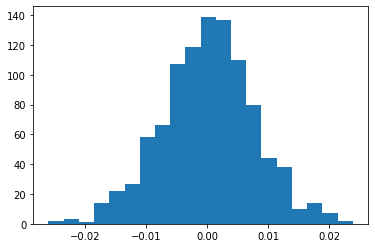

In [15]:
# Criando amostras aleatórias uniformes:
N_samples = 1000
kappas = []
for _ in range(N_samples):
    X = np.random.randint(0, 2, (len(test_df), 3))
    kappas.append(xs.fleiss_kappa(X, n_votes_per_class=False))

# Histograma do Fleiss' Kappa:
pl.hist(kappas, bins=20)
pl.show()

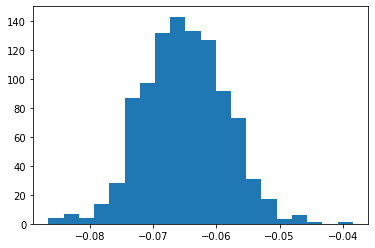

In [17]:
# Criando amostras embaralhadas:
N_samples = 1000
kappas = []
for _ in range(N_samples):
    random_df = pd.DataFrame()
    random_df[1] = test_df['hatespeech_G1']
    random_df[2] = xs.shuffle_data(test_df['hatespeech_G2'])
    random_df[3] = xs.shuffle_data(test_df['hatespeech_G3'])
    kappas.append(xs.fleiss_kappa(random_df.values, n_votes_per_class=False))
    
# Histograma do Fleiss' Kappa:
pl.hist(kappas, bins=20)
pl.show()

### Gerando votos aleatórios uniformes

In [11]:
Na = 3 # Número de anotadores
Nk = 2 # Númetro de classes
Nn = 10 # Número de exemplos

In [12]:
# Cada coluna é a classificação de um anotador.
# Cada linha é uma instância.
# Os valores são os índices da classe.
annotation_matrix = np.random.randint(0, Nk, (Nn, Na))

### Testando função Kappa

In [13]:
# Resultado esperado, segundo a wikipedia (https://en.wikipedia.org/wiki/Fleiss%27_kappa): 0.210
X_test = pd.read_csv('../dados/brutos/aux/fleiss_kappa_test_input.csv', names=list(range(1,6))).values
xs.fleiss_kappa(X_test)

0.20993070442195522